## M2 - 2018 11m u/v decomposition

In [120]:
import utide
import pandas as pd
from netCDF4 import date2num
import numpy as np

In [121]:
df = pd.read_csv('/Users/bell/scratch/18bsp2a_wcp_vel_11.nc.csv', parse_dates=True,index_col='time',na_values='1e35')

In [122]:
time = np.array([date2num(i,'days since 0001-1-1')-1 for i in df.index])

In [135]:
from utide import solve

coef = solve(time, df[' u_1205'], df[' v_1206'],
             lat=57.785,
             nodal=False,
             trend=False,
             method='ols',
             conf_int='linear',
             Rayleigh_min=0.95,)

solve: matrix prep ... solution ... diagnostics ... done.


In [136]:
from utide import reconstruct

tide = reconstruct(time, coef)

prep/calcs ... done.


In [137]:
tide.keys()


dict_keys(['t_in', 'epoch', 'constit', 'min_SNR', 'min_PE', 't_mpl', 'u', 'v'])

In [138]:
tide

{'t_in': array([736816.125     , 736816.16666667, 736816.20833333, ...,
        736968.79166667, 736968.83333333, 736968.875     ]),
 'epoch': 'python',
 'constit': None,
 'min_SNR': 2,
 'min_PE': 0,
 't_mpl': array([736816.125     , 736816.16666667, 736816.20833333, ...,
        736968.79166667, 736968.83333333, 736968.875     ]),
 'u': array([-12.99650627,   0.66963739,  14.25700598, ...,   2.49973665,
         18.18631858,  30.22838491]),
 'v': array([12.97958208, 17.8623329 , 18.59902014, ..., 16.17596329,
        16.95192024, 13.52432177])}

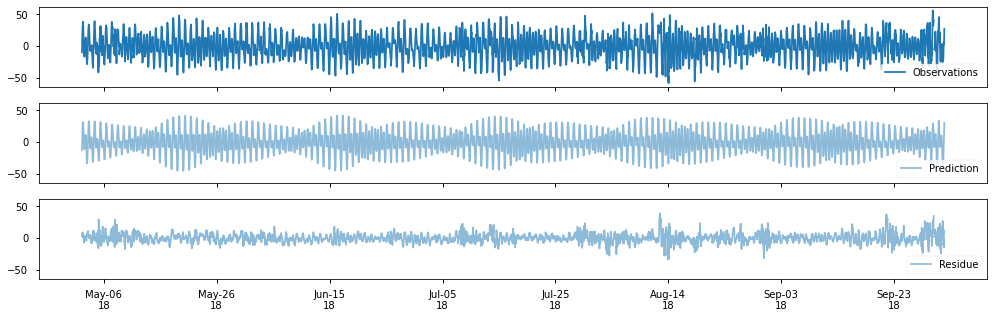

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
style.use('seaborn-notebook')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(17, 5))

ax0.plot(time, df[' u_1205'], label=u'Observations')
ax0.legend(numpoints=1, loc='lower right')

ax1.plot(time, tide['u'], alpha=0.5, label=u'Prediction')
ax1.legend(numpoints=1, loc='lower right')

ax2.plot(time, df[' u_1205']-tide['u'], alpha=0.5, label=u'Residue')
_ = ax2.legend(numpoints=1, loc='lower right')

xfmt = mdates.DateFormatter('%b-%d\n%y')
ax2.xaxis.set_major_formatter(xfmt)

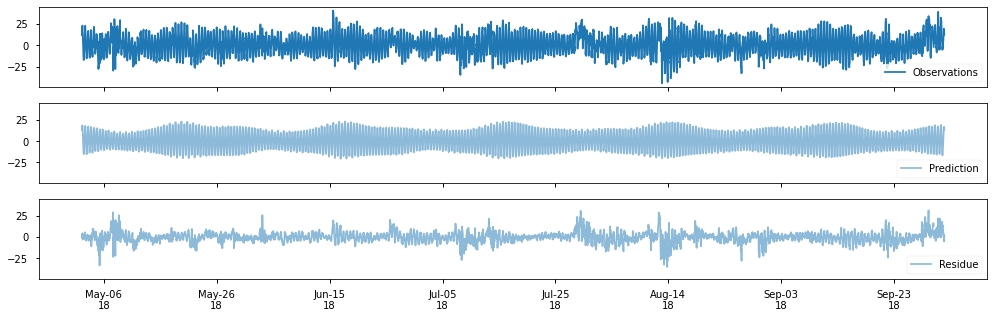

In [140]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(17, 5))

ax0.plot(time, df[' v_1206'], label=u'Observations')
ax0.legend(numpoints=1, loc='lower right')

ax1.plot(time, tide['v'], alpha=0.5, label=u'Prediction')
ax1.legend(numpoints=1, loc='lower right')

ax2.plot(time, df[' v_1206']-tide['v'], alpha=0.5, label=u'Residue')
_ = ax2.legend(numpoints=1, loc='lower right')

xfmt = mdates.DateFormatter('%b-%d\n%y')
ax2.xaxis.set_major_formatter(xfmt)

In [147]:
for i,j in enumerate(time):
    print(j,',',tide['u'][i],',',tide['v'][i])

736816.125 , -12.996506272441156 , 12.979582078190372
736816.1666666666 , 0.6696373898926238 , 17.862332900819126
736816.2083333334 , 14.257005984744765 , 18.59902014318242
736816.25 , 25.090735362464546 , 14.989326442855148
736816.2916666666 , 31.17399195354221 , 7.932074438237981
736816.3333333334 , 31.446082675080927 , -1.0741722055024412
736816.375 , 25.57293730215186 , -9.659885675985091
736816.4166666666 , 14.768587516664116 , -14.89967298532093
736816.4583333334 , 2.53404906001845 , -15.085886370522735
736816.5 , -6.912947965249415 , -10.921758160441497
736816.5416666666 , -11.35692328882618 , -4.378239673961049
736816.5833333334 , -11.147424723345242 , 3.042567048170113
736816.625 , -7.4997394960319195 , 10.27461028939957
736816.6666666666 , -1.535097149217508 , 15.78395031696947
736816.7083333334 , 5.071034952022326 , 17.92419791543804
736816.75 , 9.98097283696491 , 16.045890600280703
736816.7916666666 , 11.327809989095496 , 10.589728643151103
736816.8333333334 , 8.29478074497

In [148]:
import datetime

In [152]:
datetime.datetime.fromordinal(736816)

datetime.datetime(2018, 5, 2, 0, 0)